In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd

# Ruta al archivo en Google Drive
file_path = '/content/drive/MyDrive/Arquicompu/MuestreoEntrePcs.xlsx'

# Leer las dos pestañas del archivo Excel
df1 = pd.read_excel(file_path, 'CopiaDeTresFactoresFlamini')
df2 = pd.read_excel(file_path, 'CopiaDeTresFactoresEsteban')

# Agregar una columna para identificar la fuente de los datos
df1['source'] = 1
df2['source'] = 2

df1.rename(columns={'Normalized(ns)': 'Normalized_ns'}, inplace=True)
df2.rename(columns={'Normalized(ns)': 'Normalized_ns'}, inplace=True)


In [ ]:
# Asegurar que cada grupo tenga el mismo tamaño
min_size = min(df1.shape[0], df2.shape[0])

# Muestreo aleatorio equitativo
sampled_df1 = df1.sample(n=min_size, random_state=42)
sampled_df2 = df2.sample(n=min_size, random_state=42)

# Combinar los DataFrames muestreados
sampled_combined_df = pd.concat([sampled_df1, sampled_df2], ignore_index=True)


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Anova con N Version y Source (pc)
anova_model = ols('Normalized_ns ~ C(n) * C(version) * C(source)', data=sampled_combined_df).fit()

# Realizar el ANOVA
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print(anova_table)


                                sum_sq     df             F        PR(>F)
C(n)                       1275.720207    6.0  33707.430962  0.000000e+00
C(version)                 1846.327457    3.0  97568.346005  0.000000e+00
C(source)                     0.490058    1.0     77.690650  1.960472e-17
C(n):C(version)            1376.268158   18.0  12121.378882  0.000000e+00
C(n):C(source)                0.954999    6.0     25.233259  3.151634e-26
C(version):C(source)          0.467503    3.0     24.704966  6.286321e-15
C(n):C(version):C(source)     3.209884   18.0     28.270816  7.974357e-65
Residual                      3.179136  504.0           NaN           NaN


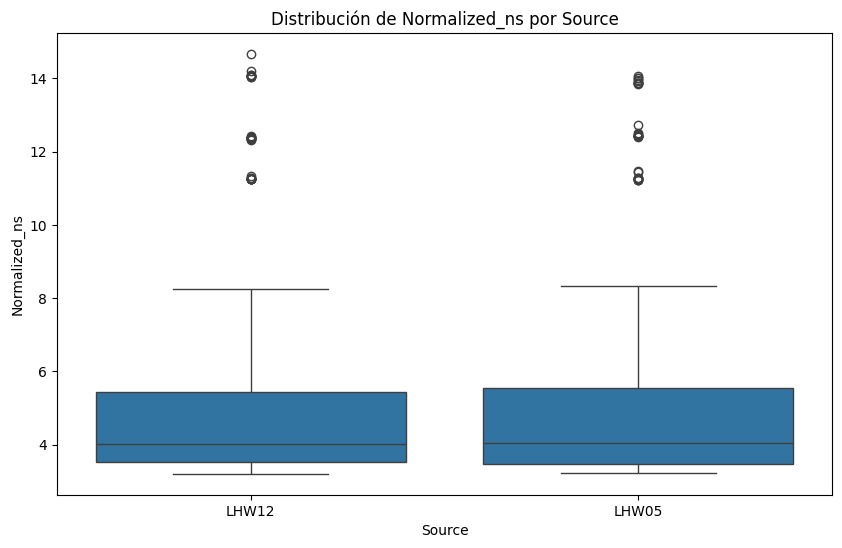

<Figure size 1000x600 with 0 Axes>

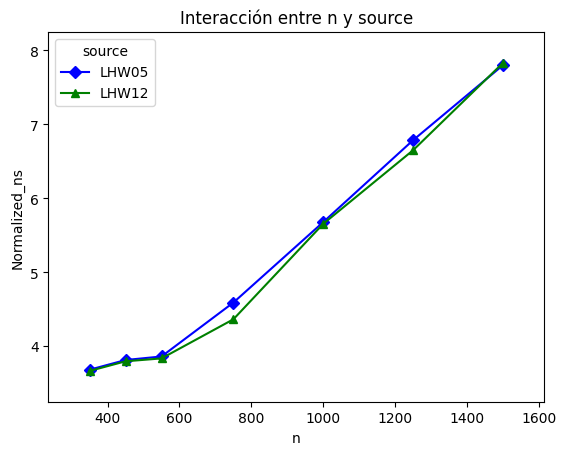

<Figure size 1000x600 with 0 Axes>

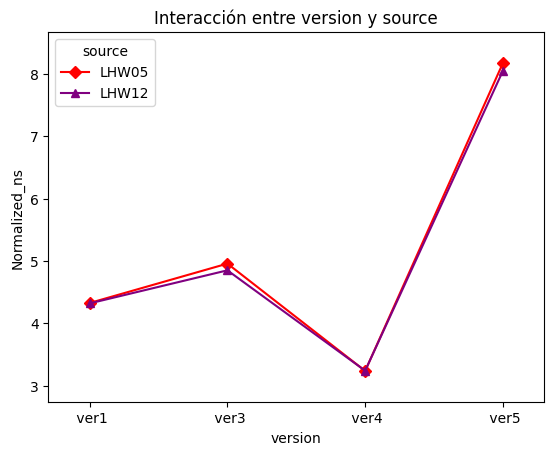

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeo de valores de source
sampled_combined_df['source'] = sampled_combined_df['source'].map({1: 'LHW12', 2: 'LHW05'})

# Boxplot para visualizar la distribución de Normalized_ns por source
plt.figure(figsize=(10, 6))
sns.boxplot(x='source', y='Normalized_ns', data=sampled_combined_df)
plt.title('Distribución de Normalized_ns por Source')
plt.xlabel('Source')
plt.ylabel('Normalized_ns')
plt.show()

# Gráfico de interacción entre source y otros factores
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot

# Gráfico de interacción entre `source` y `n`
plt.figure(figsize=(10, 6))
interaction_plot(sampled_combined_df['n'], sampled_combined_df['source'], sampled_combined_df['Normalized_ns'], markers=['D','^'], colors=['blue','green'])
plt.title('Interacción entre n y source')
plt.xlabel('n')
plt.ylabel('Normalized_ns')
plt.show()

# Gráfico de interacción entre `source` y `version`
plt.figure(figsize=(10, 6))
interaction_plot(sampled_combined_df['version'], sampled_combined_df['source'], sampled_combined_df['Normalized_ns'], markers=['D','^'], colors=['red','purple'])
plt.title('Interacción entre version y source')
plt.xlabel('version')
plt.ylabel('Normalized_ns')
plt.show()